In [1]:
from GraphTheory.read import Graph, GraphMatrix
from GraphTheory.mst import MST
from distance_data import grid04
from time import time 
import numpy as np 
from GraphTheory.christofides import christofides

ModuleNotFoundError: No module named 'GraphTheory'

In [2]:
grid04

,4,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,0,3.000000,5.000000,4.000000
1,3,0.000000,3.162277,5.000000
2,5,3.162277,0.000000,4.123106
3,4,5.000000,4.123106,0.000000


In [3]:
a = grid04.to_numpy()
print(a)

[[0.        3.        5.        4.       ]
 [3.        0.        3.162277  5.       ]
 [5.        3.162277  0.        4.1231055]
 [4.        5.        4.1231055 0.       ]]


In [4]:
#symmetric so can deal with upper triangular 
G_a = GraphMatrix(np.triu(a))
linklist = G_a.link_list
distances = G_a.dist_list
nodelist = G_a.G.nodes()
KG = MST(G_a.G)
print(linklist)
print(distances)
print(nodelist)
print(KG.ordered_distance)
print(KG.ordered_links)
print(KG.weighted_edge_list)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[3.0, 5.0, 4.0, 3.162277, 5.0, 4.1231055]
[1, 2, 3, 4]
[3.0, 3.162277, 4.0, 4.1231055, 5.0, 5.0]
[(1, 2), (2, 3), (1, 4), (3, 4), (1, 3), (2, 4)]
[(1, 2, 3.0), (1, 3, 5.0), (1, 4, 4.0), (2, 3, 3.162277), (2, 4, 5.0), (3, 4, 4.1231055)]


In [5]:
distances = KG.ordered_distance
links = KG.ordered_links

travelled_edges = [links[0]]
travelled_nodes = [links[0][0], links[0][1]]
for i,j  in zip(links[1:],distances[1:]):
    if not (i[0] and i[1]  in travelled_nodes):
        travelled_nodes.append(i[0])
        travelled_nodes.append(i[1])
        travelled_edges.append(i)
        if sorted(set(travelled_nodes)) == set(nodelist):
            break
print(travelled_edges)
print(set(travelled_nodes))

[(1, 2), (2, 3), (1, 4)]
{1, 2, 3, 4}


In [6]:
KG.kruskal()

({1, 2, 3, 4}, [(1, 2), (2, 3), (1, 4)], [3.0, 3.162277, 4.0], 10.162277)

In [7]:
# try with full matrix
G_a = GraphMatrix(a)
linklist = G_a.link_list
distances = G_a.dist_list
nodelist = G_a.G.nodes()
KG1 = MST(G_a.G)
print(linklist)
print(distances)
print(nodelist)
print(KG1.ordered_distance)
print(KG1.ordered_links)
print(KG1.weighted_edge_list)

[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2), (4, 3)]
[3.0, 5.0, 4.0, 3.0, 3.162277, 5.0, 5.0, 3.162277, 4.1231055, 4.0, 5.0, 4.1231055]
[1, 2, 3, 4]
[3.0, 3.0, 3.162277, 3.162277, 4.0, 4.0, 4.1231055, 4.1231055, 5.0, 5.0, 5.0, 5.0]
[(1, 2), (2, 1), (2, 3), (3, 2), (1, 4), (4, 1), (3, 4), (4, 3), (1, 3), (2, 4), (3, 1), (4, 2)]
[(1, 2, 3.0), (1, 3, 5.0), (1, 4, 4.0), (2, 1, 3.0), (2, 3, 3.162277), (2, 4, 5.0), (3, 1, 5.0), (3, 2, 3.162277), (3, 4, 4.1231055), (4, 1, 4.0), (4, 2, 5.0), (4, 3, 4.1231055)]


In [8]:
distances = KG1.ordered_distance
links = KG1.ordered_links
travelled_distance = distances[0]
travelled_distance_list = [distances[0]]
travelled_edges = [links[0]]
travelled_nodes = [links[0][0], links[0][1]]
for i,j  in zip(links[1:],distances[1:]):
    if not (i[0] and i[1]  in travelled_nodes):
        travelled_nodes.append(i[0])
        travelled_nodes.append(i[1])
        travelled_edges.append(i)
        travelled_distance_list.append(j)
        travelled_distance += j
        if sorted(set(travelled_nodes)) == set(nodelist):
            break
print(travelled_edges)
print(set(travelled_nodes))
print(travelled_distance)
print(travelled_distance_list)

[(1, 2), (2, 3), (1, 4)]
{1, 2, 3, 4}
10.162277
[3.0, 3.162277, 4.0]


In [9]:
KG1.kruskal() # return the same as expected.

({1, 2, 3, 4}, [(1, 2), (2, 3), (1, 4)], [3.0, 3.162277, 4.0], 10.162277)

In [10]:
from distance_data import ha30, kn57, uk12, wg22
ha_30 = ha30.to_numpy()
kn_57 = kn57.to_numpy()
uk_12 = uk12.to_numpy()
wg_22 = wg22.to_numpy()
data_sets_collected = [ha_30, kn_57, uk_12, wg_22]

In [11]:
# these are all symmetric as seen in the data_distances_matrices notebook
# just run using upper triangular matrices
GM = [GraphMatrix(np.triu(i), directed=False) for i in data_sets_collected]  # this the Graph matrix class applied
GM_G = [i.G for i in GM]   # this now allows access to the Graph object versions of the matrices
KGM = [MST(i) for i in GM_G]  # turn into MST objects where kruskals algorithm is a method of the class

In [12]:
lis = ['ha_30', 'kn_57', 'uk_12', 'wg_22']

In [13]:
#from time import
kruskal_output = []
for  i in range(4):
    print(f'kruskal agorithm for {lis[i]}')
    t0 = time()
    b = KGM[i].kruskal()
    kruskal_output.append(b)
    print(b)
    t1 = time()
    print(f'timetaken = {t1 - t0}')

kruskal agorithm for ha_30
({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}, [(13, 22), (17, 20), (15, 29), (3, 22), (3, 24), (5, 26), (8, 20), (25, 27), (2, 6), (6, 11), (8, 19), (12, 27), (16, 19), (3, 18), (28, 30), (5, 23), (14, 28), (16, 21), (1, 13), (9, 14), (2, 4), (10, 25), (7, 23), (9, 10), (10, 16), (1, 2), (14, 15), (3, 20), (16, 26)], [2, 3, 4, 5, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10, 11, 12, 12, 15, 16, 16, 20, 24, 38, 38, 38, 39, 39, 40, 41], 493)
timetaken = 1.59293532371521
kruskal agorithm for kn_57
({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57}, [(1, 11), (3, 56), (16, 53), (26, 54), (38, 50), (3, 19), (16, 27), (9, 32), (36, 39), (8, 14), (45, 50), (1, 42), (10, 12), (10, 22), (18, 53), (10, 30), (17, 30), (25, 45), (15, 37), (28, 31), (54

In [14]:
min_span_tree_ha30 = Graph(kruskal_output[0][1], kruskal_output[0][2], directed=False)  # extract the edge list and corresponding distances
min_span_tree_kn57 = Graph(kruskal_output[1][1], kruskal_output[1][2], directed=False)
min_span_tree_uk12 = Graph(kruskal_output[2][1], kruskal_output[2][2], directed=False)
min_span_tree_wg22 = Graph(kruskal_output[3][1], kruskal_output[3][2], directed=False)

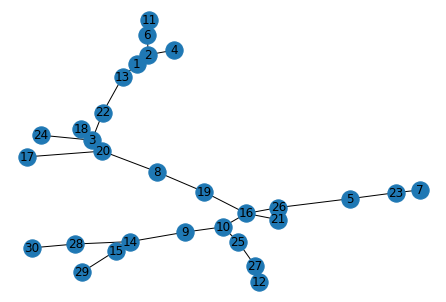

True

In [15]:
min_span_tree_ha30.draw(directed=False)
min_span_tree_ha30.connected()

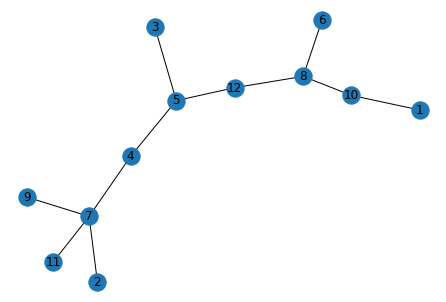

True

In [16]:
min_span_tree_uk12.draw(directed=False)
min_span_tree_uk12.connected()

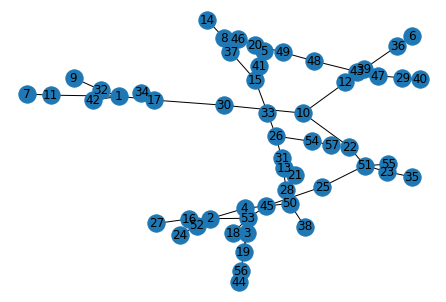

True

In [17]:
min_span_tree_kn57.draw(directed=False)
min_span_tree_kn57.connected()

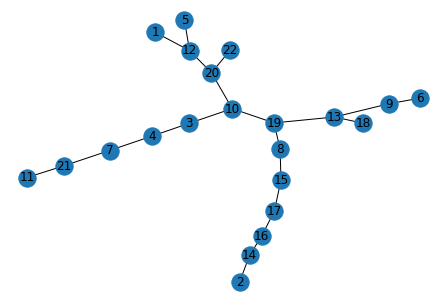

[1, 2, 5, 6, 10, 11, 12, 13, 18, 19, 20, 22]


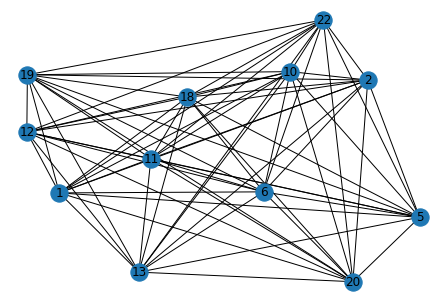

True

In [18]:
min_span_tree_wg22.draw(directed=False)
min_span_tree_wg22.connected()
odd_nodes = min_span_tree_wg22.odd_nodes()
print(odd_nodes)
GM_G[3].sub_graph(odd_nodes).draw()
GM_G[3].sub_graph(odd_nodes).connected()

In [19]:
min_span_tree_wg22.degrees()

DegreeView({1: 1, 2: 1, 3: 2, 4: 2, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2, 10: 3, 11: 1, 12: 3, 13: 3, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 3, 20: 3, 21: 2, 22: 1})

In [20]:
import networkx as nx
odd_nodes = min_span_tree_wg22.odd_nodes()

u1 = GM_G[3].sub_graph(odd_nodes).links
w1 = GM_G[3].sub_graph(odd_nodes).distance

neg_w1 = list(np.array(w1)*(-1))
new_graph = Graph(u1, neg_w1) # directed =fasle is not working
print(new_graph.G.edges())


[(1, 2), (1, 5), (1, 6), (1, 10), (1, 11), (1, 12), (1, 13), (1, 18), (1, 19), (1, 20), (1, 22), (2, 5), (2, 6), (2, 10), (2, 11), (2, 12), (2, 13), (2, 18), (2, 19), (2, 20), (2, 22), (5, 6), (5, 10), (5, 11), (5, 12), (5, 13), (5, 18), (5, 19), (5, 20), (5, 22), (6, 10), (6, 11), (6, 12), (6, 13), (6, 18), (6, 19), (6, 20), (6, 22), (10, 11), (10, 12), (10, 13), (10, 18), (10, 19), (10, 20), (10, 22), (11, 12), (11, 13), (11, 18), (11, 19), (11, 20), (11, 22), (12, 13), (12, 18), (12, 19), (12, 20), (12, 22), (13, 18), (13, 19), (13, 20), (13, 22), (18, 19), (18, 20), (18, 22), (19, 20), (19, 22), (20, 22)]


In [21]:
set_matching = nx.max_weight_matching(new_graph.G ,maxcardinality=True)
print(set_matching)

weights = [-1 * new_graph.edgelabels[f'{i}'] for i in set_matching]
print(weights)

matching_graph = Graph(list(set_matching), weights, directed=False)
matching_graph.links
matching_graph.distance

{(1, 2), (10, 11), (12, 13), (18, 19), (5, 6), (20, 22)}
[144, 111, 67, 63, 128, 20]


[144, 111, 67, 63, 128, 20]

In [22]:
minG = GM_G[3].sub_graph(odd_nodes).min_matching()
print(minG.links)
print(minG.distance)

[(1, 12), (11, 20), (18, 13), (2, 6), (10, 19), (5, 22)]
[20, 91, 35, 76, 57, 24]


In [23]:
minG.union(min_span_tree_wg22)

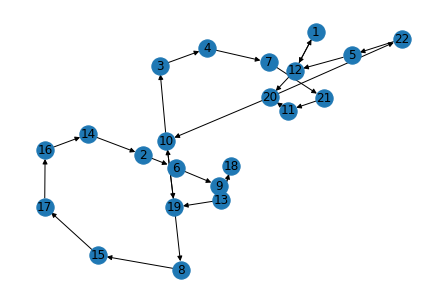

In [24]:
euler_tour = minG.union(min_span_tree_wg22).eulerian_tour()
euler_tour.draw()

In [25]:
print(euler_tour.links)
tour = [i[0] for i in euler_tour.links]
Tour = []
for vertex in tour:
    if vertex not in Tour:
        Tour.append(vertex)
Tour.append(tour[0])

links = [(i, j) for i, j in zip(Tour[:-1], Tour[1:])]
print(Tour)
print(links)

[(1, 12), (12, 20), (20, 10), (10, 19), (19, 8), (8, 15), (15, 17), (17, 16), (16, 14), (14, 2), (2, 6), (6, 9), (9, 13), (13, 18), (18, 13), (13, 19), (19, 10), (10, 3), (3, 4), (4, 7), (7, 21), (21, 11), (11, 20), (20, 22), (22, 5), (5, 12), (12, 1)]
[1, 12, 20, 10, 19, 8, 15, 17, 16, 14, 2, 6, 9, 13, 18, 3, 4, 7, 21, 11, 22, 5, 1]
[(1, 12), (12, 20), (20, 10), (10, 19), (19, 8), (8, 15), (15, 17), (17, 16), (16, 14), (14, 2), (2, 6), (6, 9), (9, 13), (13, 18), (18, 3), (3, 4), (4, 7), (7, 21), (21, 11), (11, 22), (22, 5), (5, 1)]


In [26]:
euler_tour.shortcut()
GM_G[3]
weights = [GM_G[3].G.get_edge_data(*i)['weight']
                       for i in euler_tour.shortcut() ]
print(weights)
print(euler_tour.shortcut())
print(sum(weights))

[20, 52, 33, 57, 55, 35, 28, 34, 47, 18, 76, 38, 17, 35, 137, 49, 31, 19, 19, 102, 24, 31]
[(1, 12), (12, 20), (20, 10), (10, 19), (19, 8), (8, 15), (15, 17), (17, 16), (16, 14), (14, 2), (2, 6), (6, 9), (9, 13), (13, 18), (18, 3), (3, 4), (4, 7), (7, 21), (21, 11), (11, 22), (22, 5), (5, 1)]
957


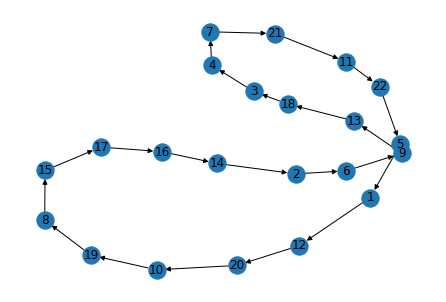

In [27]:
Graph(euler_tour.shortcut(),weights).draw()

Matrix input is symmetric.
Minimum spanning tree for west germany 22 cities.


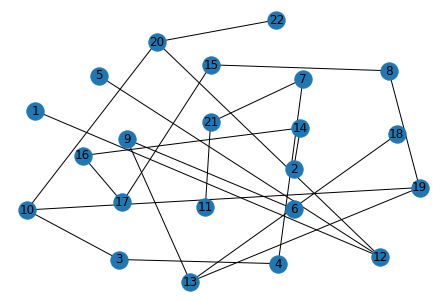

Minimum spanning tree is connected = True
Subgraph is connected = True
eulerian tour of the union of the minimum weight matching and the spanning tree for west germany 22 cities.


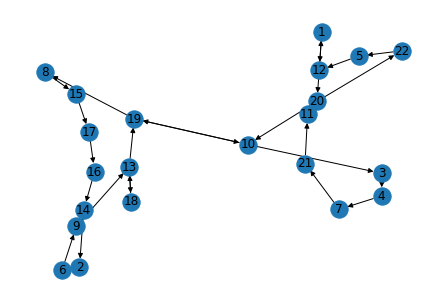

Solution of TSP for west germany 22 cities.


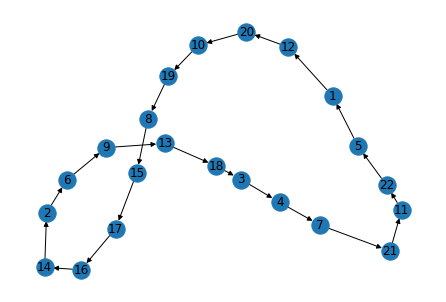

links: [(1, 12), (12, 20), (20, 10), (10, 19), (19, 8), (8, 15), (15, 17), (17, 16), (16, 14), (14, 2), (2, 6), (6, 9), (9, 13), (13, 18), (18, 3), (3, 4), (4, 7), (7, 21), (21, 11), (11, 22), (22, 5), (5, 1)]
distances: [20, 52, 33, 57, 55, 35, 28, 34, 47, 18, 76, 38, 17, 35, 137, 49, 31, 19, 19, 102, 24, 31]
total distance=957


In [28]:
christofides(wg_22, name ='west germany 22 cities', over_ride=True)